# CAOS Tutorial
This notebook goes over the basics in python and analyzes real weather data.

## Brief review of ploting in python

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


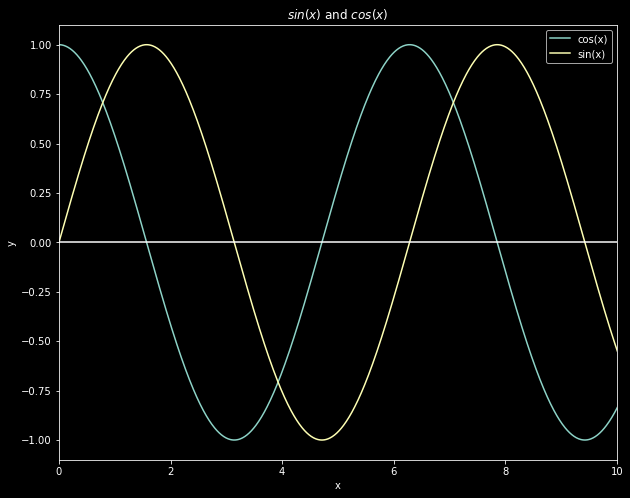

In [31]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import cos
from matplotlib import style

x = np.arange(0, 100, 0.01)
y1 = np.cos(x)
y2 = np.sin(x)
style.use('dark_background')
plt.figure(figsize=[10,8])
plt.plot(x,y1, label='cos(x)')
plt.plot(x,y2, label='sin(x)')
plt.axhline(y=0, color='w')
print(plt.style.available)

# Zooming into the plot
plt.xlim([0, 10])
# Add labels to the axes
plt.xlabel("x")
plt.ylabel("y")
# Add a title
plt.title("$sin(x)$ and $cos(x)$")
# Add a grid
# plt.grid()
# Add a basic legend
plt.legend()

## Working with data (CSV format) in Pandas
Reading in a CSV file that contains daily weather data for each day in 2017 from the Environment and Climate Change Canada for Montreal (CYUL)

In [18]:
import pandas as pd
cyul_2017 = pd.read_csv('http://www.cdmccray.com/python_tutorial/eng-daily-01012017-12312017.csv')
cyul_2017

,Date,Year,Month,Day,Data Quality,Tmax,Max Temp Flag,Tmin,Min Temp Flag,Tmean,...,Snow,Total Snow Flag,Precip,Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Max_gust,Spd of Max Gust Flag
0,2017-01-01,2017,1,1,‡,-2.4,NaN,-8.7,NaN,-5.6,...,2.8,NaN,2.4,NaN,12.0,NaN,28.0,NaN,54,NaN
1,2017-01-02,2017,1,2,‡,1.8,NaN,-10.2,NaN,-4.2,...,0.0,NaN,0.0,NaN,6.0,NaN,NaN,NaN,<31,NaN
2,2017-01-03,2017,1,3,‡,0.5,NaN,-5.8,NaN,-2.7,...,3.6,NaN,17.4,NaN,6.0,NaN,5.0,NaN,43,NaN
3,2017-01-04,2017,1,4,‡,2.5,NaN,-5.6,NaN,-1.6,...,9.0,NaN,8.0,NaN,12.0,NaN,24.0,NaN,85,NaN
4,2017-01-05,2017,1,5,‡,-5.3,NaN,-10.7,NaN,-8.0,...,0.0,T,0.0,T,13.0,NaN,24.0,NaN,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,2017,12,27,‡,-18.3,NaN,-24.5,NaN,-21.4,...,0.0,NaN,0.0,NaN,11.0,NaN,27.0,NaN,37,NaN
361,2017-12-28,2017,12,28,‡,-20.5,NaN,-26.6,NaN,-23.6,...,0.0,NaN,0.0,NaN,10.0,NaN,27.0,NaN,44,NaN
362,2017-12-29,2017,12,29,‡,-18.4,NaN,-24.8,NaN,-21.6,...,1.6,NaN,1.6,NaN,10.0,NaN,26.0,NaN,30,NaN
363,2017-12-30,2017,12,30,‡,-17.4,NaN,-24.9,NaN,-21.2,...,0.2,NaN,0.2,NaN,10.0,NaN,NaN,NaN,<31,NaN


In [19]:
# set the input of the Pandas dataframe to date
cyul_2017.set_index('Date', inplace=True)
cyul_2017

,Year,Month,Day,Data Quality,Tmax,Max Temp Flag,Tmin,Min Temp Flag,Tmean,Mean Temp Flag,...,Snow,Total Snow Flag,Precip,Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Max_gust,Spd of Max Gust Flag
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017,1,1,‡,-2.4,NaN,-8.7,NaN,-5.6,NaN,...,2.8,NaN,2.4,NaN,12.0,NaN,28.0,NaN,54,NaN
2017-01-02,2017,1,2,‡,1.8,NaN,-10.2,NaN,-4.2,NaN,...,0.0,NaN,0.0,NaN,6.0,NaN,NaN,NaN,<31,NaN
2017-01-03,2017,1,3,‡,0.5,NaN,-5.8,NaN,-2.7,NaN,...,3.6,NaN,17.4,NaN,6.0,NaN,5.0,NaN,43,NaN
2017-01-04,2017,1,4,‡,2.5,NaN,-5.6,NaN,-1.6,NaN,...,9.0,NaN,8.0,NaN,12.0,NaN,24.0,NaN,85,NaN
2017-01-05,2017,1,5,‡,-5.3,NaN,-10.7,NaN,-8.0,NaN,...,0.0,T,0.0,T,13.0,NaN,24.0,NaN,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,2017,12,27,‡,-18.3,NaN,-24.5,NaN,-21.4,NaN,...,0.0,NaN,0.0,NaN,11.0,NaN,27.0,NaN,37,NaN
2017-12-28,2017,12,28,‡,-20.5,NaN,-26.6,NaN,-23.6,NaN,...,0.0,NaN,0.0,NaN,10.0,NaN,27.0,NaN,44,NaN
2017-12-29,2017,12,29,‡,-18.4,NaN,-24.8,NaN,-21.6,NaN,...,1.6,NaN,1.6,NaN,10.0,NaN,26.0,NaN,30,NaN


In [20]:
cyul_2017.loc['2017-05-29']

Year                         2017
Month                           5
Day                            29
Data Quality                    ‡
Tmax                         19.6
Max Temp Flag                 NaN
Tmin                         12.7
Min Temp Flag                 NaN
Tmean                        16.2
Mean Temp Flag                NaN
Heat Deg Days (°C)            1.8
Heat Deg Days Flag            NaN
Cool Deg Days (°C)            0.0
Cool Deg Days Flag            NaN
Rain                          8.0
Total Rain Flag               NaN
Snow                          0.0
Total Snow Flag               NaN
Precip                        8.0
Total Precip Flag             NaN
Snow on Grnd (cm)             NaN
Snow on Grnd Flag             NaN
Dir of Max Gust (10s deg)    14.0
Dir of Max Gust Flag          NaN
Max_gust                       52
Spd of Max Gust Flag          NaN
Name: 2017-05-29, dtype: object

In [21]:
cyul_2017['Tmax'].nlargest(5)

Date
2017-06-18    32.1
2017-09-25    31.5
2017-06-12    31.4
2017-09-27    31.2
2017-09-24    30.6
Name: Tmax, dtype: float64

In [22]:
cyul_2017['Tmin'].nsmallest(5)

Date
2017-12-28   -26.6
2017-12-30   -24.9
2017-12-29   -24.8
2017-12-27   -24.5
2017-12-31   -23.8
Name: Tmin, dtype: float64

Text(0, 0.5, 'Temperature (deg C)')

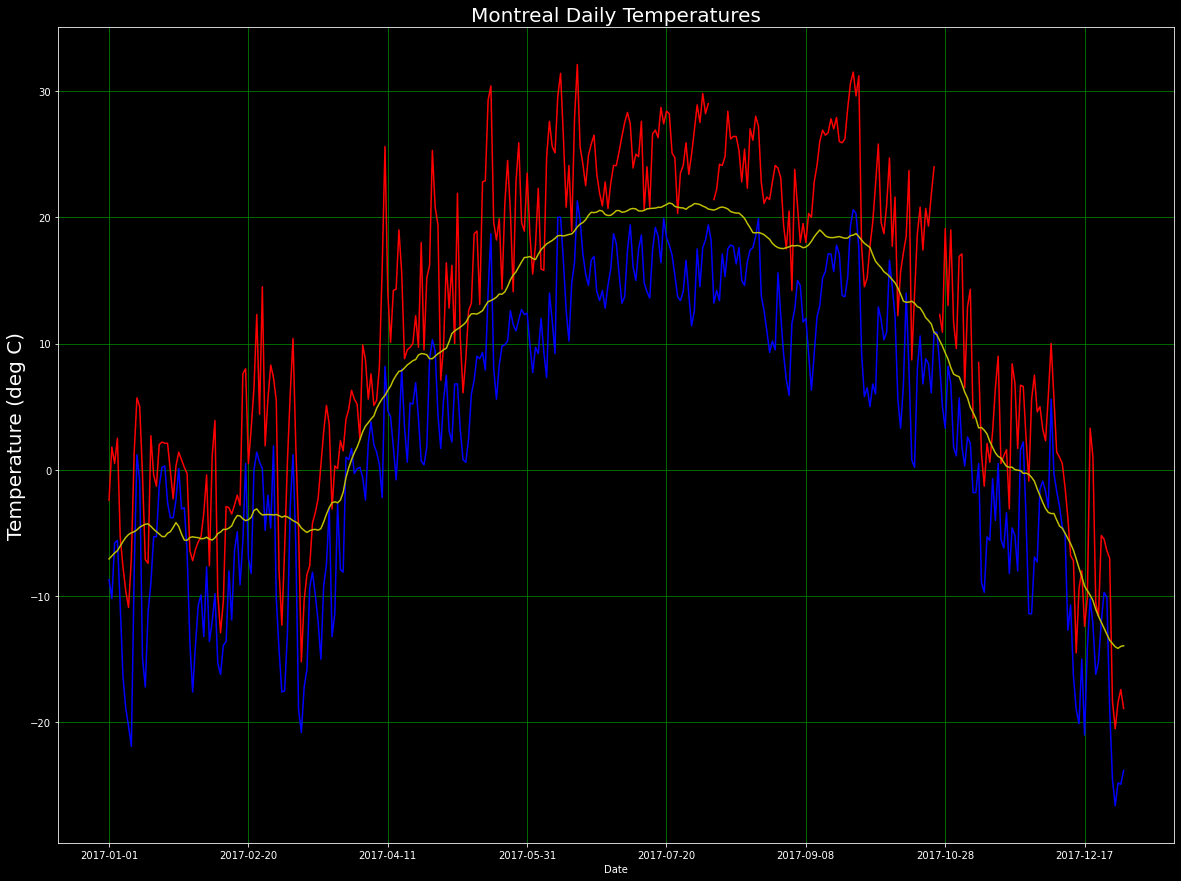

In [37]:
max_temps = cyul_2017['Tmax']
min_temps = cyul_2017['Tmin']
plt.figure()
cyul_2017['Tmax'].plot(color='red', figsize=[20,15])
cyul_2017['Tmin'].plot(color='blue')
cyul_2017['Tmean'].rolling(30, min_periods=2, center=True).mean().plot(c='y', label="30-day avg. Tmean")
plt.grid(c='g')
plt.title('Montreal Daily Temperatures', fontsize=20)
plt.ylabel('Temperature (deg C)', fontsize=20)